---
draft: true
---

In [249]:
# Import dependencies
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import PowerTransformer, StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn import svm
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

#import cleaned dataset
df = pd.read_parquet('cleaned_dataset.parquet')

# split df into two 
#dataframe with entries just for the fixed category
df_fixed = df.loc[df['net_type'] == 'Fixed'].copy()
df_fixed.reset_index(drop=True, inplace=True)
df_fixed.drop(columns='net_type', inplace=True)

#dataframe with entries just for the mobile category
df_mob = df.loc[df['net_type'] == 'Mobile'].copy()
df_mob.reset_index(drop=True, inplace=True)
df_mob.drop(columns='net_type', inplace=True)

display(df)
print(df.columns)

# create dataframe dict to iterate through
dfs = {
    'Fixed': df_fixed,
    'Mobile': df_mob,
    # import YeoJ transformed dfs
    'YeoJ_Fix': pd.read_parquet('yeoj_fixed_dataset.parquet'),
    'YeoJ_Mob': pd.read_parquet('yeoj_mob_dataset.parquet')
}

for key in dfs:
    display(dfs[key])
    print(dfs[key].columns)

,avg_d_mbps,avg_u_mbps,avg_lat_ms,avg_lat_down_ms,avg_lat_up_ms,net_type
0,50.073,18.199,40,475,1954,Mobile
1,21.784,0.745,47,1493,2252,Mobile
2,18.159,1.662,21,244,2067,Mobile
3,1.439,0.659,749,2357,5083,Mobile
4,13.498,3.525,37,598,1023,Mobile
...,...,...,...,...,...,...
19025,215.644,114.035,14,384,606,Fixed
19026,48.533,17.553,34,172,43,Fixed
19027,5.732,0.473,52,8039,304,Fixed
19028,116.025,129.465,8,91,219,Fixed


Index(['avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms', 'avg_lat_down_ms',
       'avg_lat_up_ms', 'net_type'],
      dtype='object')


,avg_d_mbps,avg_u_mbps,avg_lat_ms,avg_lat_down_ms,avg_lat_up_ms
0,104.961,104.419,6,126,94
1,212.782,33.322,26,122,223
2,109.832,9.109,18,211,164
3,194.682,116.727,20,279,93
4,151.912,13.325,19,174,454
...,...,...,...,...,...
9809,215.644,114.035,14,384,606
9810,48.533,17.553,34,172,43
9811,5.732,0.473,52,8039,304
9812,116.025,129.465,8,91,219


Index(['avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms', 'avg_lat_down_ms',
       'avg_lat_up_ms'],
      dtype='object')


,avg_d_mbps,avg_u_mbps,avg_lat_ms,avg_lat_down_ms,avg_lat_up_ms
0,50.073,18.199,40,475,1954
1,21.784,0.745,47,1493,2252
2,18.159,1.662,21,244,2067
3,1.439,0.659,749,2357,5083
4,13.498,3.525,37,598,1023
...,...,...,...,...,...
9211,42.572,23.439,22,238,640
9212,15.952,0.256,39,1189,1083
9213,107.443,25.328,24,751,1555
9214,26.593,21.297,36,565,378


Index(['avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms', 'avg_lat_down_ms',
       'avg_lat_up_ms'],
      dtype='object')


,avg_d_mbps,avg_u_mbps,avg_lat_ms,avg_lat_down_ms,avg_lat_up_ms
0,8.972164,4.759714,1.500592,5.364215,4.594474
1,11.504014,3.594225,2.152917,5.325130,5.469041
2,9.121034,2.338349,2.006061,5.997121,5.157019
3,11.159330,4.875059,2.049368,6.346418,4.583702
4,10.238558,2.695041,2.028408,5.758639,6.193776
...,...,...,...,...,...
9809,11.556506,4.850887,1.898827,6.751223,6.489121
9810,6.696179,2.960429,2.252471,5.744407,3.812195
9811,2.457252,0.387996,2.397371,10.894972,5.784466
9812,9.303431,4.982478,1.641398,4.972823,5.450639


Index(['avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms', 'avg_lat_down_ms',
       'avg_lat_up_ms'],
      dtype='object')


,avg_d_mbps,avg_u_mbps,avg_lat_ms,avg_lat_down_ms,avg_lat_up_ms
0,4.239305,3.351656,1.842729,7.078103,13.227949
1,3.317389,0.569910,1.873058,8.614639,13.627984
2,3.123101,1.020246,1.700411,6.220586,13.385472
3,0.906716,0.517075,2.171259,9.249501,16.077464
4,2.813201,1.608974,1.827349,7.380719,11.498883
...,...,...,...,...,...
9211,4.055669,3.663706,1.711899,6.189053,10.337699
9212,2.986643,0.230117,1.837787,8.302855,11.645122
9213,5.124904,3.761257,1.732857,7.683230,12.600224
9214,3.533581,3.544352,1.821830,7.305826,9.119884


Index(['avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms', 'avg_lat_down_ms',
       'avg_lat_up_ms'],
      dtype='object')


# Linear Regression

Univariate

In [250]:
# Univariate Linear regression with and without yeo-j transformation
# Predictor variable
X = dfs['Fixed']['avg_u_mbps'].values.reshape(-1, 1)
# Target variable
y = dfs['Fixed']['avg_d_mbps'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train_fix, X_test_fix, y_train_fix, y_test_fix = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model_orig = LinearRegression()

# Create a pipeline for the transformed data
pipe_trans = Pipeline([
    ('power_transform', PowerTransformer(method='yeo-johnson')),  # Apply Yeo-Johnson transformation
    ('model', LinearRegression())  # Apply linear regression
])

# Train the models
model_orig.fit(X_train_fix, y_train_fix)
pipe_trans.fit(X_train_fix, y_train_fix)

# Make predictions
y_pred_orig = model_orig.predict(X_test_fix)
y_pred_trans = pipe_trans.predict(X_test_fix)

# Evaluate the models
mae_orig = mean_absolute_error(y_test_fix, y_pred_orig)
mse_orig = mean_squared_error(y_test_fix, y_pred_orig)
rmse_orig = np.sqrt(mse_orig)
r2_orig = r2_score(y_test_fix, y_pred_orig)

mae_trans = mean_absolute_error(y_test_fix, y_pred_trans)
mse_trans = mean_squared_error(y_test_fix, y_pred_trans)
rmse_trans = np.sqrt(mse_trans)
r2_trans = r2_score(y_test_fix, y_pred_trans)

# store results in dict
results = { 
    'Original data':{
        'Mean Abs Error': mae_orig,
        'Mean Sq2 Error': mse_orig, 
        'Root Mean Sq2 Error': rmse_orig, 
        'R2': r2_orig
    },
    'Transformed data':{
        'Mean Abs Error': mae_trans,
        'Mean Sq2 Error': mse_trans, 
        'Root Mean Sq2 Error': rmse_trans, 
        'R2': r2_trans
    }
}

# convert dict to dataframe
results_df = pd.DataFrame.from_dict(results)

print(results_df)
# Create a table from the dataframe and display it
fig =  ff.create_table(results_df, index=True)
fig.show()

                     Original data  Transformed data
Mean Abs Error           88.749450         83.580674
Mean Sq2 Error        12988.151119      12465.236420
Root Mean Sq2 Error     113.965570        111.647823
R2                        0.306146          0.334081


In [251]:
# Mulitivariate Linear regression with and without yeo-j transformation
# Predictor variables
X = dfs['Fixed'].drop(columns='avg_d_mbps', axis=1)
# Target variable 
y = dfs['Fixed']['avg_d_mbps'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train_fix, X_test_fix, y_train_fix, y_test_fix = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model for originl data
model_orig = LinearRegression()

# Create a pipeline for the transformed data
pipe_trans = Pipeline([
    #('scaler', StandardScaler()),
    # Apply Yeo-Johnson transformation
    ('power_transform', PowerTransformer(method='yeo-johnson')), 
    # Apply linear regression
    ('model', LinearRegression())  
])

# Train the models
model_orig.fit(X_train_fix, y_train_fix)
pipe_trans.fit(X_train_fix, y_train_fix)

# Make predictions
y_pred_orig = model_orig.predict(X_test_fix)
y_pred_trans = pipe_trans.predict(X_test_fix)

# Evaluate the models
mae_orig = mean_absolute_error(y_test_fix, y_pred_orig)
mse_orig = mean_squared_error(y_test_fix, y_pred_orig)
rmse_orig = np.sqrt(mse_orig)
r2_orig = r2_score(y_test_fix, y_pred_orig)

mae_trans = mean_absolute_error(y_test_fix, y_pred_trans)
mse_trans = mean_squared_error(y_test_fix, y_pred_trans)
rmse_trans = np.sqrt(mse_trans)
r2_trans = r2_score(y_test_fix, y_pred_trans)

# store results in dict
results = { 
    'Original data':{
        'Mean Abs Error': mae_orig,
        'Mean Sq2 Error': mse_orig, 
        'Root Mean Sq2 Error': rmse_orig, 
        'R2': r2_orig
    },
    'Transformed data':{
        'Mean Abs Error': mae_trans,
        'Mean Sq2 Error': mse_trans, 
        'Root Mean Sq2 Error': rmse_trans, 
        'R2': r2_trans
    }
}

# convert dict to dataframe
results_df = pd.DataFrame.from_dict(results)

print(results_df)
# Create a table from the DataFrame and display it
fig =  ff.create_table(results_df, index=True)
fig.show()

                     Original data  Transformed data
Mean Abs Error           84.074094         78.798233
Mean Sq2 Error        11856.275510      10688.059009
Root Mean Sq2 Error     108.886526        103.383069
R2                        0.366613          0.429022


# Gradient Boosting Machine
## Multivariate

In [252]:
# Predictor variables
X = dfs['Fixed'].drop(columns='avg_d_mbps', axis=1)
# Target variable
y = dfs['Fixed']['avg_d_mbps'].values  

# Split the data into training and testing sets
X_train_fix, X_test_fix, y_train_fix, y_test_fix = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a XGBoost model
model = GradientBoostingRegressor()

# Train the model
model.fit(X_train_fix, y_train_fix)

# Make predictions
y_pred_orig = model.predict(X_test_fix)


# Evaluate the models
mae_orig = mean_absolute_error(y_test_fix, y_pred_orig)
mse_orig = mean_squared_error(y_test_fix, y_pred_orig)
rmse_orig = np.sqrt(mse_orig)
r2_orig = r2_score(y_test_fix, y_pred_orig)

# store results in dict
results = { 
    'Original data':{
        'Mean Abs Error': mae_orig,
        'Mean Sq2 Error': mse_orig, 
        'Root Mean Sq2 Error': rmse_orig, 
        'R2': r2_orig
    }
}

#convert dict to dataframe
results_df = pd.DataFrame.from_dict(results)

print(results_df)
# Create a table from the DataFrame and display it
fig =  ff.create_table(results_df, index=True)
fig.show()

                     Original data
Mean Abs Error           66.398040
Mean Sq2 Error         8591.947001
R2                        0.541000
Root Mean Sq2 Error      92.692756


# Classification

In [253]:
# Create training and testing sets for the classification models

# Define the target variable and features
target = 'net_type'
features = df.drop(columns=target).columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)


## Support Vector Machine Models

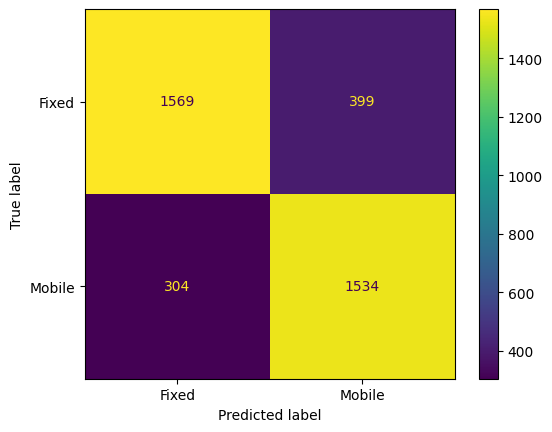

              precision    recall  f1-score   support

       Fixed       0.84      0.80      0.82      1968
      Mobile       0.79      0.83      0.81      1838

    accuracy                           0.82      3806
   macro avg       0.82      0.82      0.82      3806
weighted avg       0.82      0.82      0.82      3806



In [254]:
#| label: fig-orgvector
#| fig-cap: "SVM original data confusion matrix"
#| code-fold: true

#Support Vector Machine model
model = svm.SVC()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# Evaluate the model
print(classification_report(y_test, y_pred))

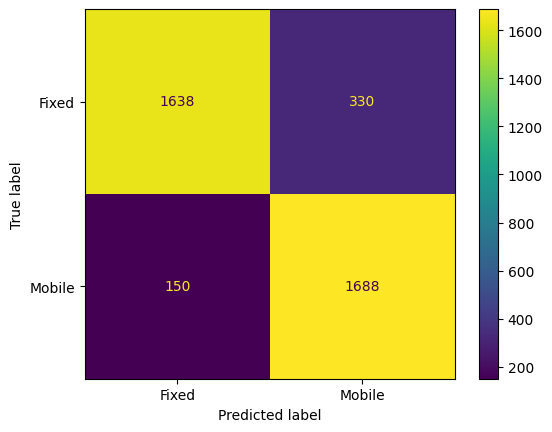

              precision    recall  f1-score   support

       Fixed       0.92      0.83      0.87      1968
      Mobile       0.84      0.92      0.88      1838

    accuracy                           0.87      3806
   macro avg       0.88      0.88      0.87      3806
weighted avg       0.88      0.87      0.87      3806



In [255]:
#| label: fig-transvector
#| fig-cap: "SVM transformed data confusion matrix"
#| code-fold: true

# Support Vector Machine model with yeo-j transform

# Create a pipeline for the transformed data
pipe_trans = Pipeline([
    # Apply Yeo-Johnson transformation
    ('power_transform', PowerTransformer(method='yeo-johnson')), 
    # Create a SVM model
    ('model', svm.SVC())  
])

# Train the model
pipe_trans.fit(X_train, y_train)

# Make predictions
y_pred = pipe_trans.predict(X_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=pipe_trans.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe_trans.classes_)
disp.plot()
plt.show()

# Evaluate the model
print(classification_report(y_test, y_pred))

## Random Forest Classifier Models

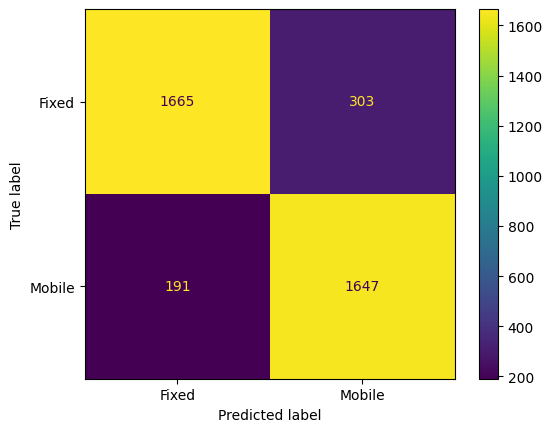

              precision    recall  f1-score   support

       Fixed       0.90      0.85      0.87      1968
      Mobile       0.84      0.90      0.87      1838

    accuracy                           0.87      3806
   macro avg       0.87      0.87      0.87      3806
weighted avg       0.87      0.87      0.87      3806



In [256]:
#| label: fig-randforest
#| fig-cap: "Random forest confusion matrix"
#| code-fold: true

# Random Forest Classifier Model

# Create a pipeline for the transformed data
pipe_trans = Pipeline([
    # Apply Random Forest
    ('model', RandomForestClassifier(n_estimators=300))
])

# Train the model
pipe_trans.fit(X_train, y_train)

# Make predictions
y_pred = pipe_trans.predict(X_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=pipe_trans.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe_trans.classes_)
disp.plot()
plt.show()

# Evaluate the model
print(classification_report(y_test, y_pred))

In [258]:
#| label: lst-gridsearch
#| code-fold: false

# Perform grid search to find more optimal hyperparameters for 
# The Random Forest Classifier Model

# Define the parameter grid
param_grid = {
    'model__max_depth': [None, 5, 10, 15],
    'model__max_leaf_nodes': [None, 5, 10, 15],
    'model__min_samples_leaf': [1, 2, 4],
    'model__min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipe_trans, param_grid, cv=2, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 2 folds for each of 144 candidates, totalling 288 fits


{'model__max_depth': None, 'model__max_leaf_nodes': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5}
0.8707304256437205


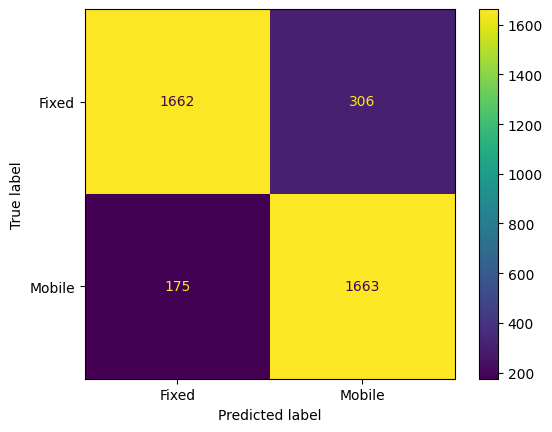

              precision    recall  f1-score   support

       Fixed       0.90      0.84      0.87      1968
      Mobile       0.84      0.90      0.87      1838

    accuracy                           0.87      3806
   macro avg       0.87      0.87      0.87      3806
weighted avg       0.88      0.87      0.87      3806



In [259]:
#| label: fig-randforest-betterpars
#| fig-cap: "Random forest confusion matrix trained with more optimal parameters"
#| code-fold: true

# Try Random Forest classifier with better parameters
# Create a pipeline for the transformed data
pipe_trans = Pipeline([
    # Apply Random Forest
    ('model', RandomForestClassifier(n_estimators=300, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=5,  ))  
])

# Train the model
pipe_trans.fit(X_train, y_train)

# Make predictions
y_pred = pipe_trans.predict(X_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=pipe_trans.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe_trans.classes_)
disp.plot()
plt.show()

# Evaluate the model
print(classification_report(y_test, y_pred))